In [7]:
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(stringr)
library(ggrepel)
library(ggh4x)
library(ggpubr)

In [8]:
df<-read.csv("05_Olink/GZMH_KLRD1_SF4_Olink.csv")

df$CMV<-df$lab.revisionHistory.dataHistory.CMV.Ab.Screen.Result..CMVRES..newValue

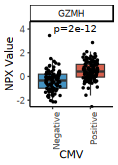

In [15]:
options(repr.plot.width = 25/25.4, repr.plot.height = 35/25.4)
p<-ggplot(df%>% filter(Assay=='GZMH'), aes(x=CMV, y=NPX_bridged,fill=CMV	)) +
    geom_boxplot( outlier.shape = NA,lwd=0.25) +
geom_point(position = position_jitter(width = 0.2),
           color="black", 
           size=0.7,
           stroke=0) +
theme_classic(base_size=6)+  
stat_compare_means(aes(label = paste0("p=", after_stat(p.format))),
    size=2,
                   vjust=-0.5,
    label.x=1.25)+theme(strip.background = element_rect(linewidth = 0.5))+
    scale_fill_manual(values = c("Positive" = '#d6604d', 
                                 "Negative" = '#4393c3'))+
    scale_y_continuous(limits = c(NA, NA), 
                       expand = expansion(mult = c(0, 0.2)))+
theme(legend.position="none")+
xlab('CMV')+
ylab('NPX Value')+ theme(axis.text.x = element_text(angle = 90, hjust=1))+
facet_wrap(~Assay,ncol=1 ) 
p
ggsave('FigureK.pdf',p,width = 25/25.4,height = 35/25.4)